In [ ]:
#load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import tree
from sklearn import metrics

The HCV (Hepatitis) dataset contains laboratory values of blood donors and Hepatitis C patients and demographic values like age

In [ ]:
# reading csv file and load data
data =  pd.read_csv('hcvdat0.csv')
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
#dropping first column because not needed for analysis
data.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
#shape of the dataset
data.shape

(615, 13)

**DATASET DESCRIPTION** </br>
All attributes except Category and Sex are numerical. Attributes 1 to 4 refer to the data of the patient. The laboratory data are the attributes 5-14.</br>
1) X (Patient ID/No.) </br>
2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') - whether the patient was just a blood donor or if they have HCV </br>
3) Age (in years) - Patient's age</br>
4) Sex (f,m) - Patient's sex</br>
5) ALB - Albumin levels</br>
6) ALP - Alkaline phosphate level</br>
7) ALT - Alanine transaminase level</br>
8) AST - Aspartate Aminotransferase</br>
9) BIL - Bilirubin level</br>
10) CHE - Cholinesterase levels</br>
11) CHOL - Cholesterol levels</br>
12) CREA - Creatinine levels</br>
13) GGT - Gamma-glutamyltransferase level</br>
14) PROT - Total protein levels

The target attribute for classification is Category (blood donors vs. Hepatitis C (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis) 

In [ ]:
#describe data
data.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [ ]:
data.describe(include='all')  

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615,615.000000,615,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
unique,5,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0=Blood Donor,NaN,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,533,NaN,377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,47.408130,NaN,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,NaN,10.055105,NaN,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,NaN,19.000000,NaN,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,NaN,39.000000,NaN,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,NaN,47.000000,NaN,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,NaN,54.000000,NaN,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000


In [ ]:
#converting category and sex columns to categorical values
data['Category'] = data.Category.map({'0=Blood Donor':0, '0s:suspect Blood Donor':0, '1=Hepatitis':1, '2=Fibrosis':1, '3=Cirrhosis':1})
data.Sex = data.Sex.apply(lambda x: 0 if x == 'm' else 1)

In [ ]:
# count number of males and females, males are more which is a biased dataset
num_sex = data.Sex.value_counts()
num_sex

0    377
1    238
Name: Sex, dtype: int64

In [ ]:
#Number of each category
num_category = data.Category.value_counts()
num_category

0.0    533
1.0     75
Name: Category, dtype: int64

In [ ]:
#Number of males and females by category
num_sex_by_category = data.groupby('Category').Sex.value_counts()
num_sex_by_category

Category  Sex
0.0       0      318
          1      215
1.0       0       53
          1       22
Name: Sex, dtype: int64

In [ ]:
#mean age by category
mean_age_by_category = data.groupby('Category').Age.mean()
mean_age_by_category

Category
0.0    47.131332
1.0    48.426667
Name: Age, dtype: float64

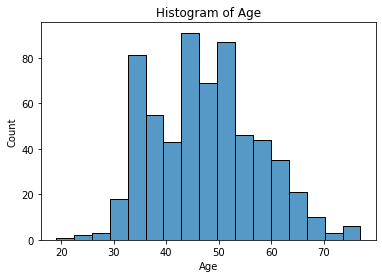

In [ ]:
#Histogram of age
sns.histplot(data=data, x='Age')
plt.title('Histogram of Age')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  608 non-null    float64
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 62.6 KB


In [ ]:
#check NaN values/missing values
data.isnull().sum().sum()

38

In [ ]:
data.isna().sum()

Category     7
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [ ]:
feature_names =['Age','Sex','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

Text(0.5, 1.0, 'Correlation between the attributes')

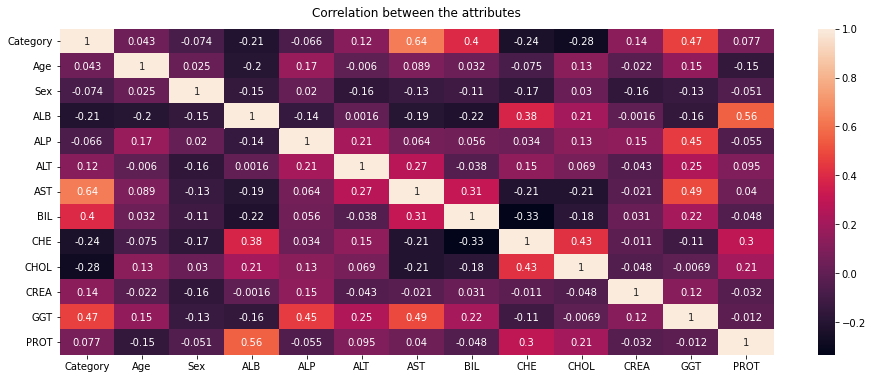

In [ ]:
#correlation between attributes
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation between the attributes', fontdict={'fontsize':12}, pad=12)

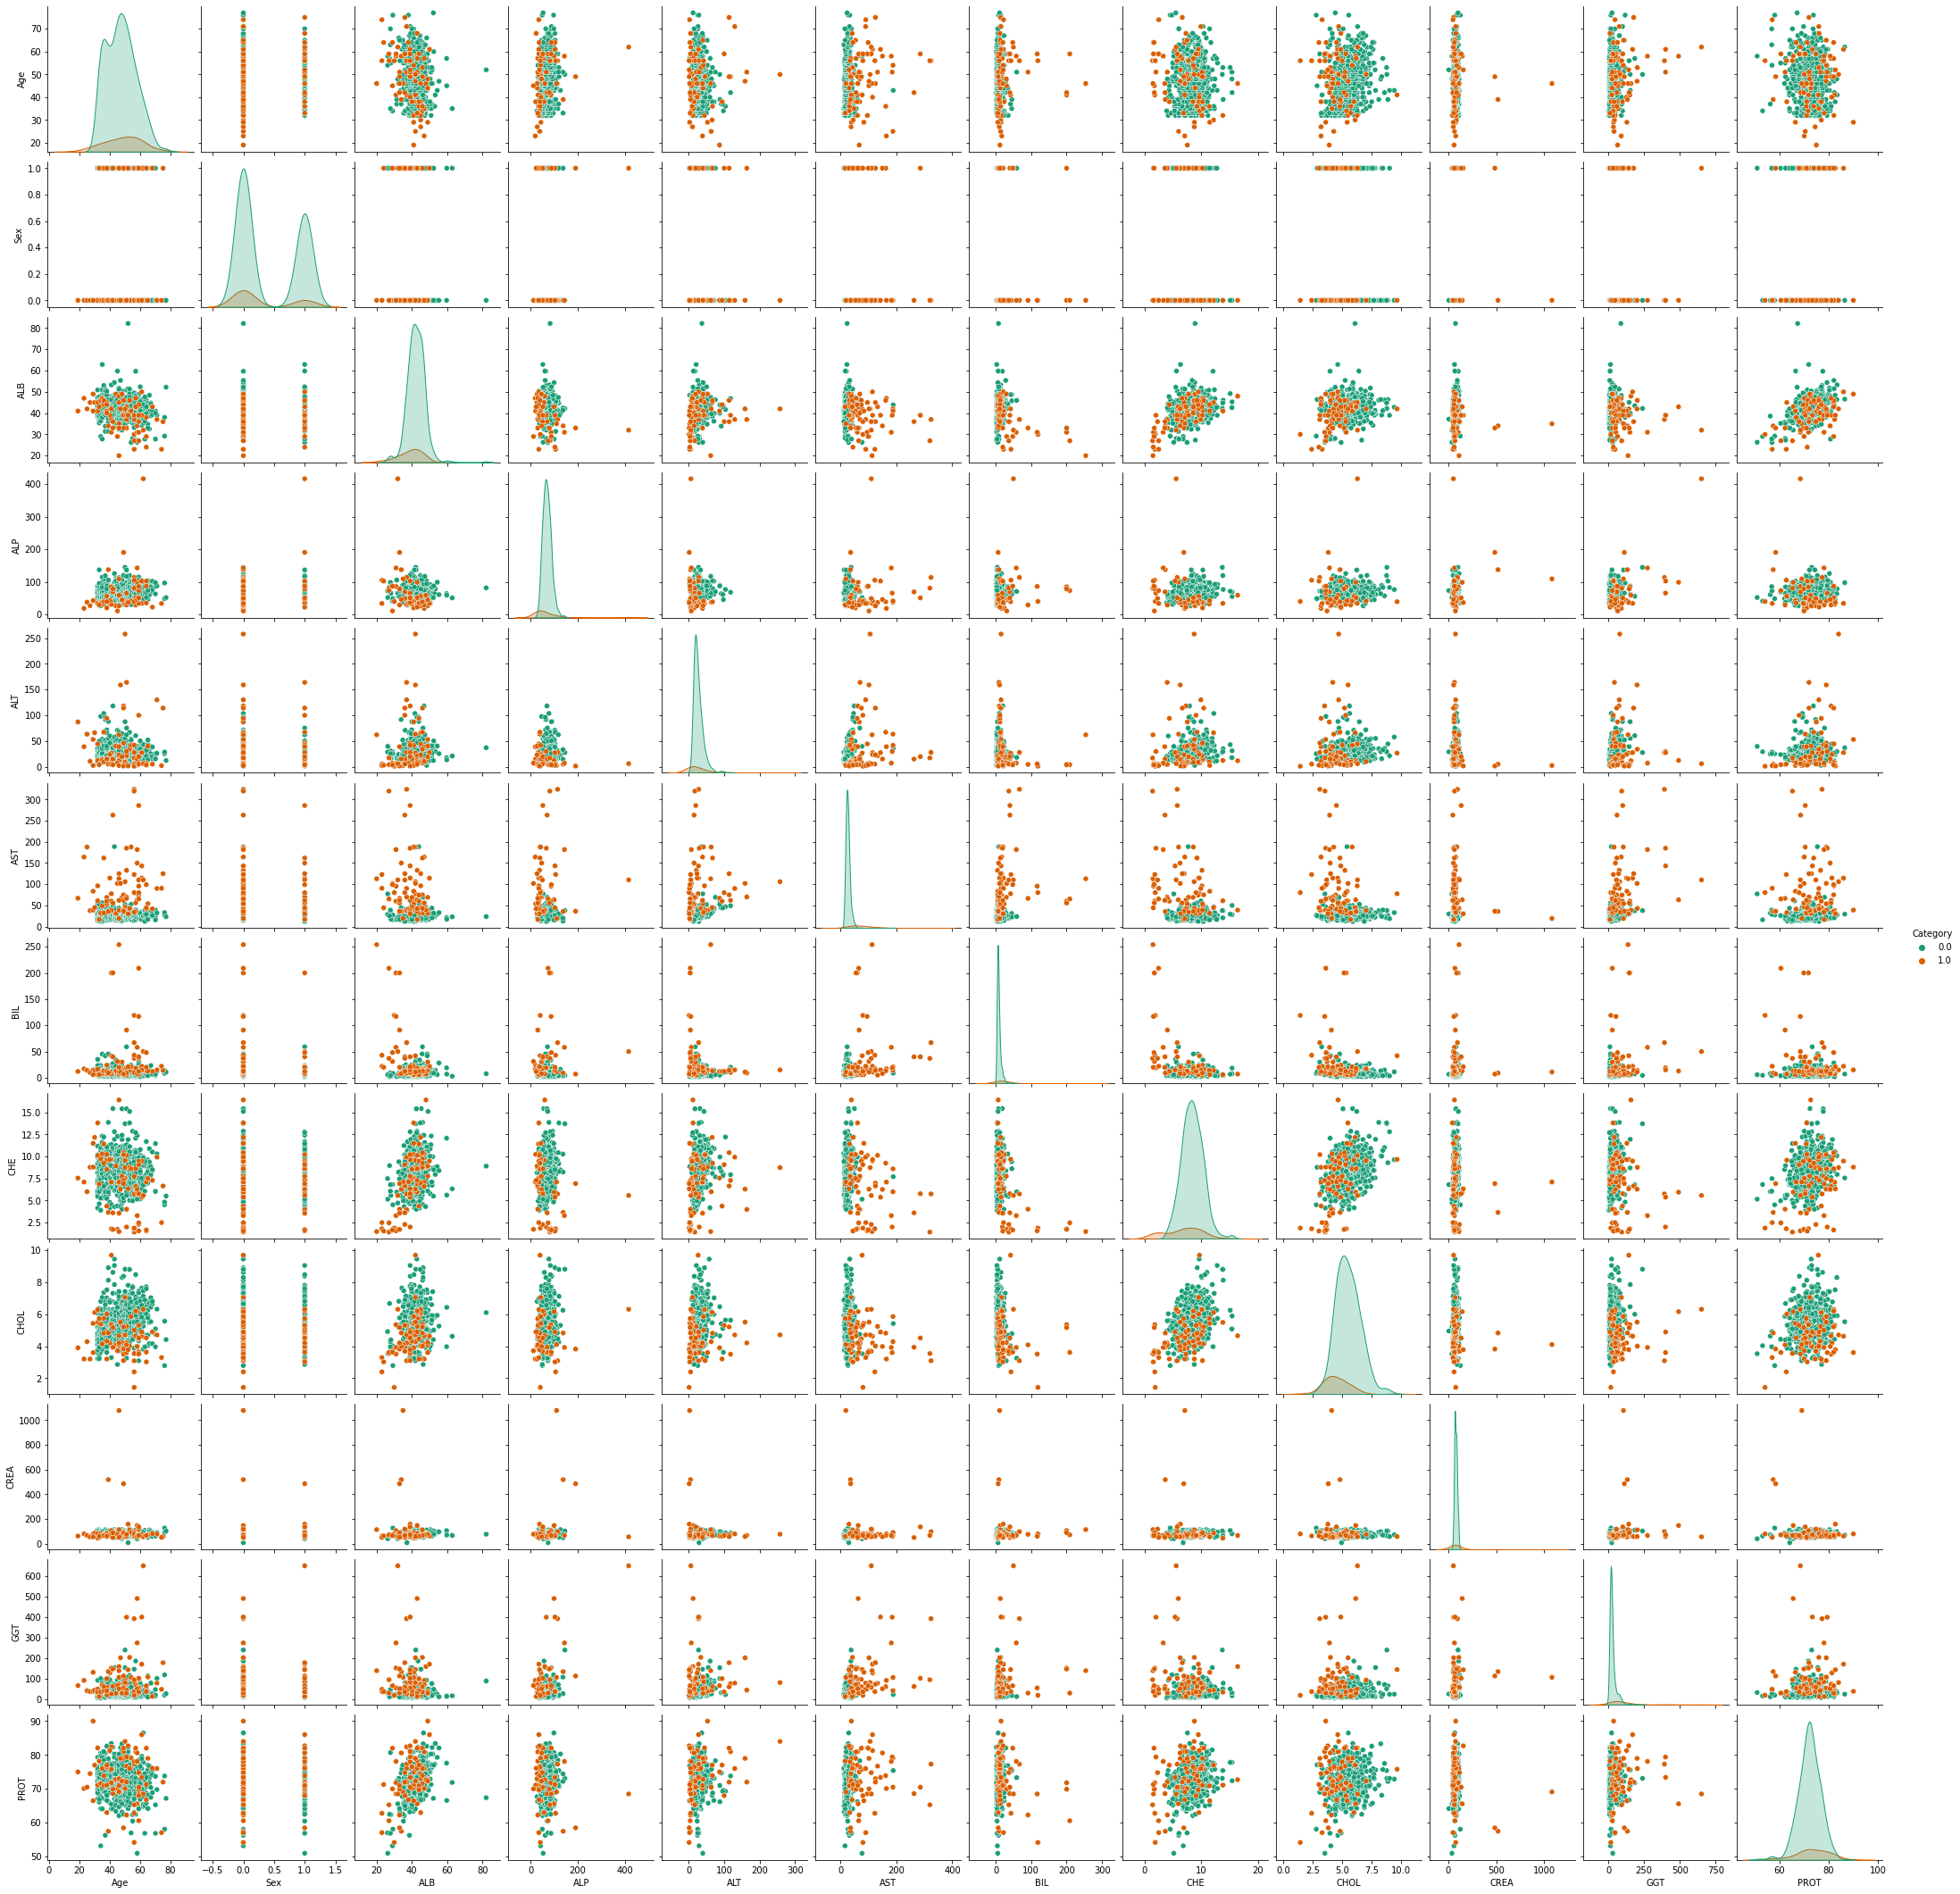

In [ ]:
sns.pairplot(data,hue='Category',palette='Dark2')

In [ ]:
#drop NaN values
data.dropna(inplace=True)

In [ ]:
data.shape

(582, 13)

In [ ]:
X = data.drop(columns='Category')
y = data['Category']

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Oversampling with SMOTE
os = SMOTE(sampling_strategy='minority',random_state = 1,k_neighbors=4)
train_smote_X,train_smote_Y = os.fit_resample(X_train,y_train)
X_train = pd.DataFrame(data = train_smote_X, columns=X_train.columns)
y_train = pd.DataFrame(data = train_smote_Y)

In [ ]:
#scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train=np.ravel(y_train)

In [ ]:
#KNN Model
knn = KNeighborsClassifier()
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range with 10 fold cross validation
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 99.29%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_k=knn.predict(X_test) 

print(classification_report(y_test, y_pred_k))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       106
         1.0       0.91      0.91      0.91        11

    accuracy                           0.98       117
   macro avg       0.95      0.95      0.95       117
weighted avg       0.98      0.98      0.98       117



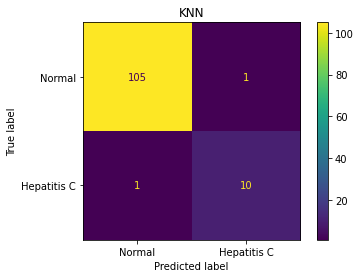

In [ ]:
classes=['Normal','Hepatitis C']
cm = confusion_matrix(y_test, y_pred_k)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
plt.title('KNN')
plt.show()

In [ ]:
metrics.f1_score(y_test, y_pred_k, average='weighted')

0.9829059829059829

In [ ]:
#Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred_l = classifier.predict(X_test)

print(classification_report(y_test, y_pred_l))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       106
         1.0       1.00      1.00      1.00        11

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



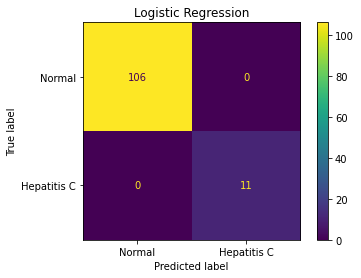

In [ ]:
classes=['Normal','Hepatitis C']
cm = confusion_matrix(y_test, y_pred_l)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
plt.title('Logistic Regression')
plt.show()

In [ ]:
metrics.f1_score(y_test, y_pred_l, average='weighted')

1.0

In [ ]:
#SVM
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear'] #corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [ ]:
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       106
         1.0       1.00      0.36      0.53        11

    accuracy                           0.94       117
   macro avg       0.97      0.68      0.75       117
weighted avg       0.94      0.94      0.93       117

Evaluation: RBF kernel
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       106
         1.0       1.00      0.91      0.95        11

    accuracy                           0.99       117
   macro avg       1.00      0.95      0.97       117
weighted avg       0.99      0.99      0.99       117

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96       106
         1.0       0.56      0.82      0.67        11

    accuracy                           0.92       117
   macro avg       0.77      0.88      0.81     

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001,'auto'],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=1)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma='auto', kernel='poly')


In [ ]:
y_pred_s = grid.predict(X_test)
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       106
         1.0       1.00      0.91      0.95        11

    accuracy                           0.99       117
   macro avg       1.00      0.95      0.97       117
weighted avg       0.99      0.99      0.99       117



In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_s))

Accuracy: 0.9914529914529915


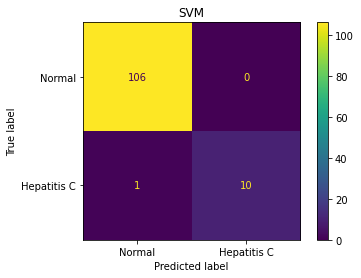

In [ ]:
classes=['Normal','Hepatitis C']
cm = confusion_matrix(y_test, y_pred_s)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
plt.title('SVM')
plt.show()

In [ ]:
metrics.f1_score(y_test, y_pred_s, average='weighted')

0.9912695546498365

<ipython-input-188-de271a9d281d>:8: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X_train2, y_train.astype(np.integer), clf=clf, legend=2)
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM Decision Region Boundary')

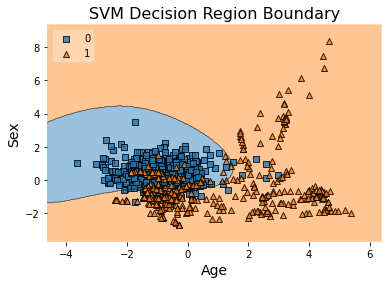

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=1,gamma=0.1, kernel='rbf')
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.astype(np.integer), clf=clf, legend=2)

plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


In [ ]:
#Decision Tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

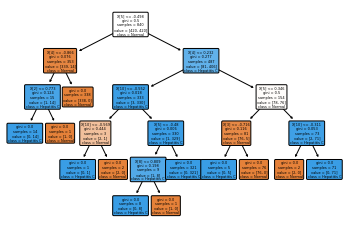

<Figure size 7200x1440 with 0 Axes>

In [ ]:
tree.plot_tree(clf, class_names=classes, filled=True, rounded=True)
plt.savefig('dt.png')
plt.figure(figsize=(100, 20))
plt.show()

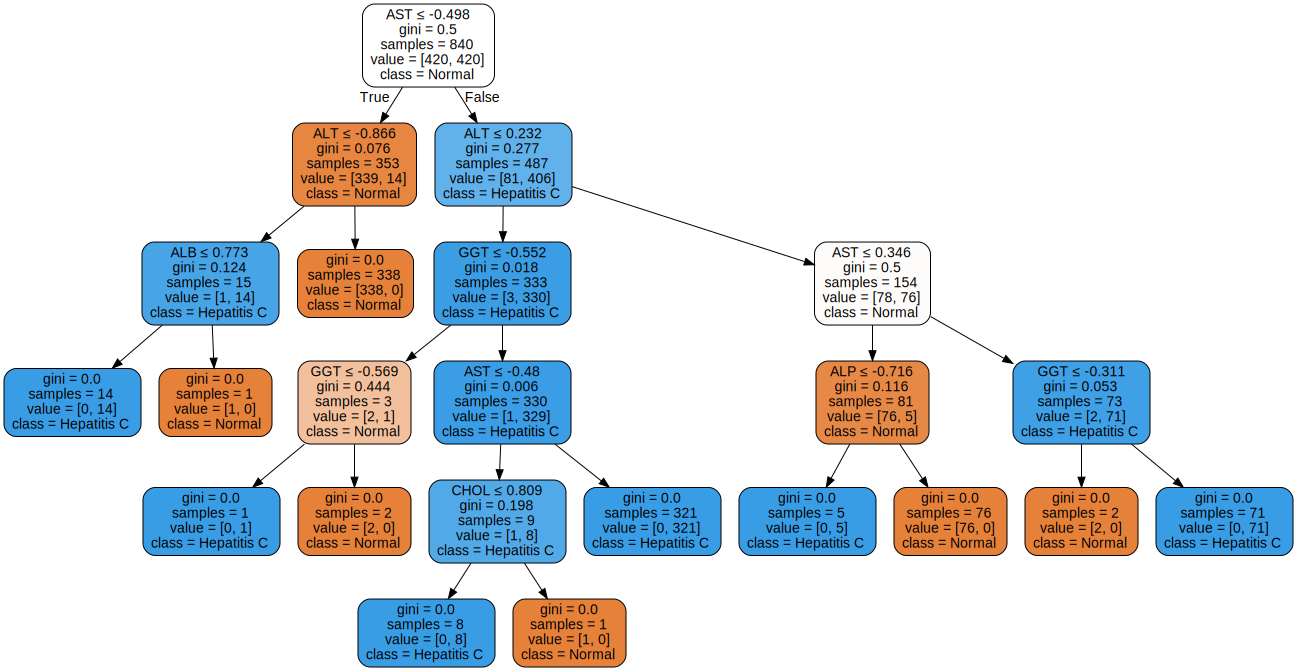

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, 
                  feature_names=feature_names,  
                  class_names=classes,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.format = "png"
graph.render("dt")

'dt.png'

In [ ]:
#Predict the response for test dataset
y_pred_d = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_d))

Accuracy: 0.9914529914529915


In [ ]:
print(classification_report(y_test,y_pred_d))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       106
         1.0       0.92      1.00      0.96        11

    accuracy                           0.99       117
   macro avg       0.96      1.00      0.98       117
weighted avg       0.99      0.99      0.99       117



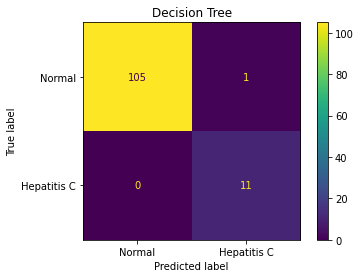

In [ ]:
classes=['Normal','Hepatitis C']
cm = confusion_matrix(y_test, y_pred_d)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.title('Decision Tree')
plt.show()

In [ ]:
metrics.f1_score(y_test, y_pred_d, average='weighted')

0.9916185424118661

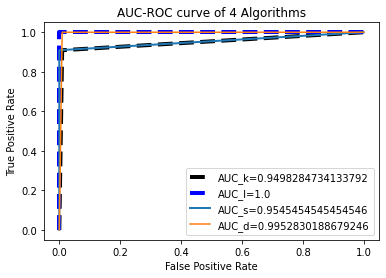

In [ ]:
fpr0, tpr0, _ = metrics.roc_curve(y_test, y_pred_k)
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_l)
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_s)
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_d)
auc0 = metrics.roc_auc_score(y_test, y_pred_k)
auc1 = metrics.roc_auc_score(y_test, y_pred_l)
auc2 = metrics.roc_auc_score(y_test, y_pred_s)
auc3 = metrics.roc_auc_score(y_test, y_pred_d)
#create ROC curve
plt.plot(fpr0,tpr0,'--',label="AUC_k="+str(auc0), linewidth = 4, color='k')
plt.plot(fpr1,tpr1,'--',label="AUC_l="+str(auc1), linewidth = 4, color ='b')
plt.plot(fpr2,tpr2,label="AUC_s="+str(auc2), linewidth = 2)
plt.plot(fpr3,tpr3,label="AUC_d="+str(auc3))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('AUC-ROC curve of 4 Algorithms')
plt.show()